Load sentiment data into the dataframe

In [2]:
%%sql --database TwitterAnalysis --container sentimentAnalysis --output df_sentiment
SELECT c.sentiment_classification, c.aboutVirus, c.aboutResistance, c.aboutCorona, c.timeStamp FROM c

▶ View Query Metrics 
 
 
 
 totalExecutionTimeInMs : 148.42 queryCompileTimeInMs : 1.2999999999999998 queryLogicalPlanBuildTimeInMs : 0.30999999999999994 queryPhysicalPlanBuildTimeInMs : 0.04 queryOptimizationTimeInMs : 0 VMExecutionTimeInMs : 142.23 indexLookupTimeInMs : 0 documentLoadTimeInMs : 91.57999999999998 systemFunctionExecuteTimeInMs : 0 userFunctionExecuteTimeInMs : 0 retrievedDocumentCount : 11975 retrievedDocumentSize : 8653739 outputDocumentCount : 11975 outputDocumentSize : 1685542 writeOutputTimeInMs : 11.5 averageIndexUtilizationRation : 1

Total sentiment

sentiment_classification
neg    4576
pos    7399
dtype: int64


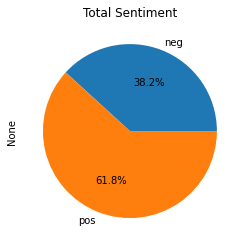

In [11]:
df_result = df_sentiment.groupby("sentiment_classification").size()
print(df_result.head())
df_result.plot.pie(autopct='%1.1f%%', title='Total Sentiment')

No Keyword Sentiment

sentiment_classification
neg    4171
pos    6295
dtype: int64


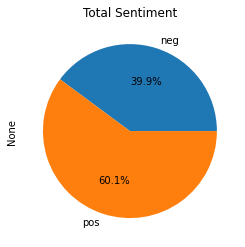

In [6]:
df_result = df_sentiment.loc[(df_sentiment.aboutCorona == False) & (df_sentiment.aboutVirus == False) & (df_sentiment.aboutResistance == False)].groupby("sentiment_classification").size()
print(df_result.head())
df_result.plot.pie(autopct='%1.1f%%', title='Total Sentiment')

Virus sentiment

sentiment_classification
neg    305
pos    671
dtype: int64


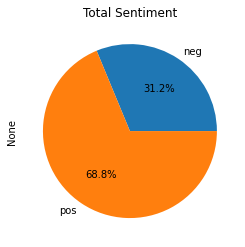

In [10]:
df_result = df_sentiment.loc[(df_sentiment.aboutVirus == True)].groupby("sentiment_classification").size()
print(df_result.head())
df_result.plot.pie(autopct='%1.1f%%', title='Total Sentiment')

Resistance sentiment

sentiment_classification
neg    101
pos    443
dtype: int64


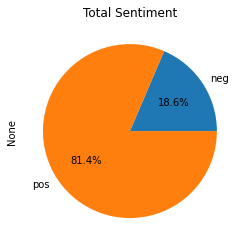

In [9]:
df_result = df_sentiment.loc[(df_sentiment.aboutResistance == True)].groupby("sentiment_classification").size()
print(df_result.head())
df_result.plot.pie(autopct='%1.1f%%', title='Total Sentiment')

Corona sentiment

sentiment_classification
neg    161
pos    471
dtype: int64


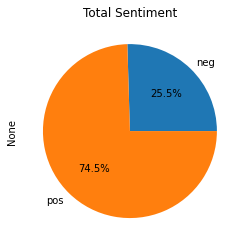

In [8]:
df_result = df_sentiment.loc[(df_sentiment.aboutCorona == True)].groupby("sentiment_classification").size()
print(df_result.head())
df_result.plot.pie(autopct='%1.1f%%', title='Total Sentiment')

Total number of tweets and their sentiment per day.

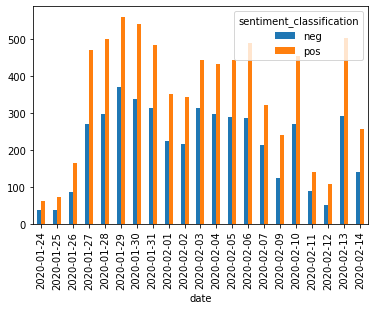

In [3]:
df_sentiment["date"] = df_sentiment["timeStamp"].apply(pd.to_datetime).dt.date
df_sentiment['tweets'] = None
df = df_sentiment.groupby(['date','sentiment_classification'])['tweets'].size().reset_index()
df_result = pd.pivot_table(df, values = 'tweets', index='date', columns='sentiment_classification').reset_index()
df_result.plot.bar(x='date')

Total number of virus-tweets and their sentiment per day.

In [ ]:
df_sentiment_virus = df_sentiment.loc[(df_sentiment.aboutVirus == True)]
df_sentiment_virus["date"] = df_sentiment_virus["timeStamp"].apply(pd.to_datetime).dt.date
df_sentiment_virus['tweets'] = None
df = df_sentiment_virus.groupby(['date','sentiment_classification'])['tweets'].size().reset_index()
df_result = pd.pivot_table(df, values = 'tweets', index='date', columns='sentiment_classification').reset_index()
df_result.plot.bar(x='date')

Total number of resistance-tweets and their sentiment per day.

In [ ]:
df_sentiment_resistance = df_sentiment.loc[(df_sentiment.aboutResistance == True)]
df_sentiment_resistance["date"] = df_sentiment_resistance["timeStamp"].apply(pd.to_datetime).dt.date
df_sentiment_resistance['tweets'] = None
df = df_sentiment_resistance.groupby(['date','sentiment_classification'])['tweets'].size().reset_index()
df_result = pd.pivot_table(df, values = 'tweets', index='date', columns='sentiment_classification').reset_index()
df_result.plot.bar(x='date')

Total number of corona-tweets and their sentiment per day.

/home/cosmosuser/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/cosmosuser/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


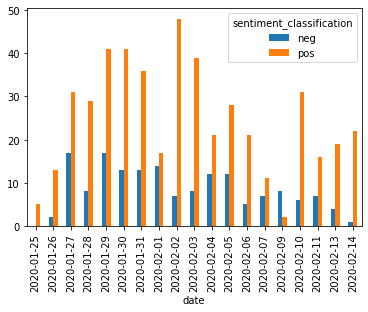

In [4]:
df_sentiment_corona = df_sentiment.loc[(df_sentiment.aboutCorona == True)]
df_sentiment_corona["date"] = df_sentiment_corona["timeStamp"].apply(pd.to_datetime).dt.date
df_sentiment_corona['tweets'] = None
df = df_sentiment_corona.groupby(['date','sentiment_classification'])['tweets'].size().reset_index()
df_result = pd.pivot_table(df, values = 'tweets', index='date', columns='sentiment_classification').reset_index()
df_result.plot.bar(x='date')